# Aprende a generar informes automatizados con LangGraph e inteligencia artificial


## 0. Planteamiento del problema y configuración del entorno
En el panorama actual del análisis de datos y la inteligencia artificial, la generación automática de informes completos y coherentes representa un desafío significativo.
Este ejercicio práctico aborda precisamente este desafío mediante la creación de un **agente de generación de reportes basado en LangGraph e inteligencia artificial.** A diferencia de los enfoques tradicionales basados en plantillas o análisis estadísticos predefinidos, **nuestra solución aprovecha los últimos avances en modelos de lenguaje** para:

- 1. Crear equipos virtuales de analistas especializados en diferentes aspectos de un tema.
- 2. Realizar entrevistas simuladas para recopilar información detallada y en tiempo real sobre el tema deseado.
- 3. Sintetizar los hallazgos en un informe coherente y bien estructurado.

Este enfoque permite generar reportes más ricos en contenido, con diferentes perspectivas y un nivel de profundidad que sería difícil de alcanzar con métodos tradicionales.

### *Librerías requeridas*
Para este proyecto, utilizaremos diversas librerías especializadas en procesamiento de lenguaje natural, gestión de grafos de estados y manipulación de datos:

- **LangGraph**: framework de vanguardia para la creación de agentes IA basados en grafos de estados.

- **LangChain Community y Core**: ecosistema para construir aplicaciones con modelos de lenguaje.

- **OpenAI**: librería para acceder al API de los modelos de GPT.

- **Google Gemini**:librería para acceder al API de los modelos generativos de Google.

- **Pandas**: librería para la manipulación y análisis de datos estructurados.

- **Matplotlib**: librería para la generación de gráficos y visualizaciones.

- **Tavily Python**: kit de desarrollo de software (SDK) que permite interactuar fácilmente con la API de Tavily y que posibilita la búsqueda de información en la web con inteligencia artificial.

- **Wikipedia**: librería para el acceso a la API de Wikipedia para búsquedas.

El primer paso de este ejercicio es instalar las librerías necesarias. Para ello, ejecutamos el bloque siguiente:

In [ ]:
# Se cargan librerías de base de Python para gestionar la instalación de dependencias
import importlib
import subprocess
import sys
import time
import traceback
import re
from io import StringIO

def instalar_dependencias():
    """
    Instala las bibliotecas necesarias si no están presentes en el sistema.
    No carga los módulos, solo asegura que estén instalados.
    """
    bibliotecas_requeridas = {
        'langgraph': 'langgraph',
        'langgraph-sdk': 'langgraph_sdk',
        'langgraph-checkpoint-sqlite': 'langgraph_checkpoint_sqlite',
        'langsmith': 'langsmith',
        'langchain-community': 'langchain_community',
        'langchain-core': 'langchain_core',
        'langchain-google-genai': 'langchain_google_genai',
        'langchain_openai': 'langchain_openai',
        'pandas': 'pandas',
        'matplotlib': 'matplotlib',
        'tavily-python': 'tavily_python',
        'wikipedia': 'wikipedia',
        'trustcall': 'trustcall',
        'pyppeteer': 'pyppeteer'
    }

    print(f"Python: versión {sys.version.split()[0]}")

    for nombre_instalacion, nombre_paquete in bibliotecas_requeridas.items():
        try:
            subprocess.check_call(
                [sys.executable, "-m", "pip", "install", "--quiet", nombre_instalacion]
            )
            print(f"✓ {nombre_paquete} instalado/verificado correctamente")
        except subprocess.CalledProcessError:
            print(f"✗ Error al instalar {nombre_paquete}")

instalar_dependencias()

Python: versión 3.11.12
✓ langgraph instalado/verificado correctamente
✓ langgraph_sdk instalado/verificado correctamente
✓ langgraph_checkpoint_sqlite instalado/verificado correctamente
✓ langsmith instalado/verificado correctamente
✓ langchain_community instalado/verificado correctamente
✓ langchain_core instalado/verificado correctamente
✓ langchain_google_genai instalado/verificado correctamente
✓ langchain_openai instalado/verificado correctamente
✓ pandas instalado/verificado correctamente
✓ matplotlib instalado/verificado correctamente
✓ tavily_python instalado/verificado correctamente
✓ wikipedia instalado/verificado correctamente
✓ trustcall instalado/verificado correctamente
✓ pyppeteer instalado/verificado correctamente



Una vez instaladas las librerias, y antes de comenzar con el desarrollo del agente, es necesario configurar cuentas y obtener las claves API necesarias para acceder a los diferentes servicios que utilizaremos. A continuación, se detallan los pasos necesarios:

### OpenAI
Para utilizar los modelos de GPT, necesitarás una cuenta en OpenAI y una clave API:

1. Regístrate en [OpenAI Platform](https://platform.openai.com/signup).
2. Una vez efectuado el registro, ve a la sección de [API Keys](https://platform.openai.com/account/api-keys).
3. Crea una nueva clave API y guárdala de forma segura.
4. En nuestro código, esta clave se configura en la variable de entorno `OPENAI_API_KEY`.

### Google Gemini (Alternativa gratuita)
Alternativamente, puedes utilizar Google Gemini que ofrece una opción gratuita:

1. Accede a [Google AI Studio](https://makersuite.google.com/app/apikey).
2. Crea una cuenta si no tienes una.
3. Genera una clave API en la sección de "API Keys".
4. En nuestro código, esta clave se configura en la variable de entorno `GOOGLE_API_KEY`.

### Clave API de Tavily Search

Para la búsqueda de información en la web, utilizamos Tavily:

1. Regístrate en [Tavily AI](https://tavily.com/#api).
2. Después de registrarte, ve a la sección de API Keys.
3. Genera una nueva clave API.
4. En nuestro código, esta clave se configura en la variable de entorno `TAVILY_API_KEY`.

### Cuenta y API de LangChain

Para el seguimiento y análisis de nuestro agente, utilizamos LangSmith de LangChain:

1. Regístrate en [LangSmith](https://smith.langchain.com/).
2. Una vez dentro, ve a la sección de "API Keys" en los ajustes.
3. Crea una nueva clave API.
4. En nuestro código, esta clave se configura en la variable de entorno `LANGCHAIN_API_KEY`.

Algunas consideraciones importantes:

- **Seguridad de las API Keys**: nunca compartas tus claves API ni las subas a repositorios públicos.

- **Límites de Uso**: si estás utilizando planes gratuitos, es posible que encuentres limitaciones en el número de llamadas que puedes hacer a las API cuando el reporte tiene muchas llamadas en paralelo. El código está preparado para manejar estos escenarios y puedes reducir el número de entrevistadores del reporte, pero ten en cuenta que podrías necesitar esperar entre ejecuciones o considerar actualizar a planes de pago para proyectos más grandes.


Con estos requisitos configurados, estará todo listo para comenzar a trabajar con el agente de generación de reportes utilizando LangGraph e inteligencia artificial.

> Nota: es conveniente introducir las claves de API en las variables de entorno del sistema para garantizar la seguridad.

In [ ]:
import os

# Configurar directamente las claves API obtenidas y dar un nombre al proyecto en langsmith
os.environ["GOOGLE_API_KEY"] = "tu_clave_aqui"
os.environ["TAVILY_API_KEY"] = "tu_clave_aqui"
os.environ["LANGCHAIN_API_KEY"] = "tu_clave_aqui"
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "report-generator"
os.environ["OPENAI_API_KEY"] = "tu_clave_aqui"


# Inicializar el modelo de lenguaje
from langchain_openai import ChatOpenAI
modelo_lenguaje = ChatOpenAI(model="gpt-4.1-nano") #10 céntimos por millón de tokens de entrada y 40 céntimos por millón de tokens de salida

# Alternativamente, podemos usar Google Gemini en su  versión gratuita, lo que puede generar problemas por limites de llamadas
#from langchain_google_genai import ChatGoogleGenerativeAI
#modelo_lenguaje = ChatGoogleGenerativeAI(model="gemini-1.5-flash-8b")

## 1. Aprendiendo sobre LangGraph:  framework avanzando para la creación de agentes IA
### *1.1 Fundamentos de LangGraph*
LangGraph representa la vanguardia en el desarrollo de agentes de inteligencia artificial. A diferencia de los enfoques tradicionales que utilizan cadenas secuenciales o sistemas monolíticos, LangGraph utiliza grafos de estados para modelar el comportamiento de los agentes, permitiendo flujos de trabajo mucho más complejos y flexibles.

El concepto fundamental de LangGraph es el grafo de estados, donde:

- Los **nodos** representan componentes individuales o estados del agente.
- Las **aristas** o "edges" definen las transiciones posibles entre estados.
- Las **condiciones** determinan dinámicamente el camino a seguir en el grafo.

Este paradigma permite crear agentes que pueden:

- Tomar decisiones complejas basadas en el contexto.
- Mantener conversaciones multi-turno con memoria a largo plazo.
- Coordinar múltiples sub-agentes especializados.
- Gestionar puntos de entrada para interacción humana.

## *1.2 Ventajas sobre otros frameworks*

LangGraph ofrece ventajas significativas sobre otros frameworks para la construcción de agentes:

- **Flexibilidad**: permite definir flujos de trabajo no lineales con bifurcaciones condicionales.

- **Modularidad**: facilita la división de tareas complejas en componentes independientes.

- **Depuración**: proporciona herramientas avanzadas para visualizar y depurar el comportamiento del agente.

- **Persistencia**: incluye mecanismos integrados para guardar y restaurar el estado del agente.

- **Escalabilidad**: permite escalar desde aplicaciones simples hasta sistemas complejos multi-agente.

En el contexto de la generación de reportes, estas características nos permiten diseñar un sistema que puede gestionar múltiples analistas virtuales, coordinar sus investigaciones, y sintetizar sus hallazgos en un informe coherente.

## 2. Implementación del Agente

La arquitectura consta de tres componentes principales que conforman el flujo de trabajo:
1. **Generador de analistas**: crea perfiles especializados para diferentes aspectos del tema.
2. **Sistema de entrevistas**: simula entrevistas para recopilar información detallada.
3. **Generador de reportes**: sintetiza la información en un informe coherente.

> Nota: La arquitectura completa del sistema, incluyendo modelos de datos, componentes principales y flujo del proceso está documentada en detalle en el README del proyecto.

### *2.1 Generación de analistas virtuales*

El primer paso en nuestro proceso es la generación de un equipo diverso de analistas virtuales, cada uno especializado en un aspecto diferente del tema a investigar. Esta diversidad de perspectivas es crucial para producir un informe completo y equilibrado.

Este subgrafo implementa un proceso iterativo donde:
1. El modelo genera un conjunto inicial de analistas basado en el tema.
2. El usuario puede revisar estos analistas y proporcionar retroalimentación.
3. El sistema puede regenerar los analistas incorporando esta retroalimentación.

La capacidad de intervención humana es crucial para garantizar que los analistas generados cubran adecuadamente todos los aspectos relevantes del tema.

Comenzamos implementando las clases de pydantic que sirven como modelos estructurados de los outputs generados por este flujo:

In [ ]:
from typing import List
from typing_extensions import TypedDict
from pydantic import BaseModel, Field

class Analista(BaseModel):
    """
    Modelo que representa un analista virtual especializado en un aspecto del tema.
    """
    afiliacion: str = Field(
        description="Organización o institución a la que pertenece el analista.",
    )
    nombre: str = Field(
        description="Nombre completo del analista."
    )
    rol: str = Field(
        description="Especialidad o función del analista relacionada con el tema.",
    )
    descripcion: str = Field(
        description="Perfil detallado del analista incluyendo áreas de interés y motivaciones.",
    )

    @property
    def perfil_completo(self) -> str:
        """Devuelve el perfil completo del analista en formato estructurado."""
        return f"Nombre: {self.nombre}\nRol: {self.rol}\nAfiliación: {self.afiliacion}\nDescripción: {self.descripcion}\n"

class Perspectivas(BaseModel):
    """
    Modelo que representa la colección de analistas que aportarán diferentes perspectivas al reporte.
    """
    analistas: List[Analista] = Field(
        description="Lista completa de analistas con sus respectivos perfiles.",
    )

class EstadoGeneracionAnalistas(TypedDict):
    """
    Modelo que representa el estado para el nodo de generación de analistas en el grafo.
    """
    tema: str # Tema de investigación
    max_analistas: int # Número máximo de analistas a generar
    retroalimentacion_humana: str # Feedback del usuario para refinar analistas
    analistas: List[Analista] # Lista de analistas generados

A continuación, desarrollamos los nodos y el flujo que los conecta:

In [ ]:
from IPython.display import Image, display
from langgraph.graph import START, END, StateGraph
from langchain_core.runnables.graph import MermaidDrawMethod
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

# Instrucciones para el modelo de generación de analistas
instrucciones_analistas = """Estás encargado de crear un conjunto de perfiles de analistas virtuales. Sigue estas instrucciones cuidadosamente:

1. Primero, revisa el tema de investigación:
{tema}

2. Examina cualquier retroalimentación editorial proporcionada para guiar la creación de los analistas:
{retroalimentacion_humana}

3. Determina los aspectos más interesantes basándote en el tema y/o la retroalimentación.

4. Selecciona los {max_analistas} aspectos más relevantes.

5. Asigna un analista especializado a cada aspecto."""

def crear_analistas(estado: EstadoGeneracionAnalistas):
    """
    Genera un equipo de analistas virtuales especializados en diferentes
    aspectos del tema a investigar.
    """
    tema = estado['tema']
    max_analistas = estado['max_analistas']
    retroalimentacion_humana = estado.get('retroalimentacion_humana', '')

    # Configurar el modelo para generar la estructura de Perspectivas
    modelo_estructurado = modelo_lenguaje.with_structured_output(Perspectivas)

    # Preparar mensaje del sistema con instrucciones
    mensaje_sistema = instrucciones_analistas.format(
        tema=tema,
        retroalimentacion_humana=retroalimentacion_humana,
        max_analistas=max_analistas
    )

    # Generar el conjunto de analistas
    perspectivas = modelo_estructurado.invoke(
        [SystemMessage(content=mensaje_sistema)] +
        [HumanMessage(content="Genera el conjunto de analistas, asegurate de asignarles un nombre imaginario de personajes de ficción de las series los simpsons y modern family, de modo que no puedan ser asociados con nadie real.")] # aseguramos en el mensaje que los personajes sean ficticios para evitar coincidencias
    )

    # Actualizar el estado con los analistas generados
    return {"analistas": perspectivas.analistas}

def retroalimentacion_humana(estado: EstadoGeneracionAnalistas):
    """
    Nodo que permite la intervención humana para refinar los analistas generados.
    Este nodo funciona como punto de interrupción en el grafo.
    """
    pass

def determinar_continuacion(estado: EstadoGeneracionAnalistas):
    """
    Decide el siguiente paso basado en si hay retroalimentación humana.
    """
    # Verificar si hay retroalimentación del usuario
    retroalimentacion = estado.get('retroalimentacion_humana', None)
    if retroalimentacion:
        return "crear_analistas"

    # De lo contrario, terminar este subgrafo
    return END

# Construir el grafo para la generación de analistas
constructor = StateGraph(EstadoGeneracionAnalistas)
constructor.add_node("crear_analistas", crear_analistas)
constructor.add_node("retroalimentacion_humana_node", retroalimentacion_humana)
constructor.add_edge(START, "crear_analistas")
constructor.add_edge("crear_analistas", "retroalimentacion_humana_node")
constructor.add_conditional_edges(
    "retroalimentacion_humana_node",
    determinar_continuacion,
    ["crear_analistas", END]
)

# Compilar el grafo con punto de interrupción en retroalimentación humana
memoria = MemorySaver()
grafo_analistas = constructor.compile(
    interrupt_before=['retroalimentacion_humana_node'],
    checkpointer=memoria
)

# Visualizar el grafo
#display(Image(grafo_analistas.get_graph(xray=1).draw_mermaid_png()))

Podemos representar el flujo del siguiente modo: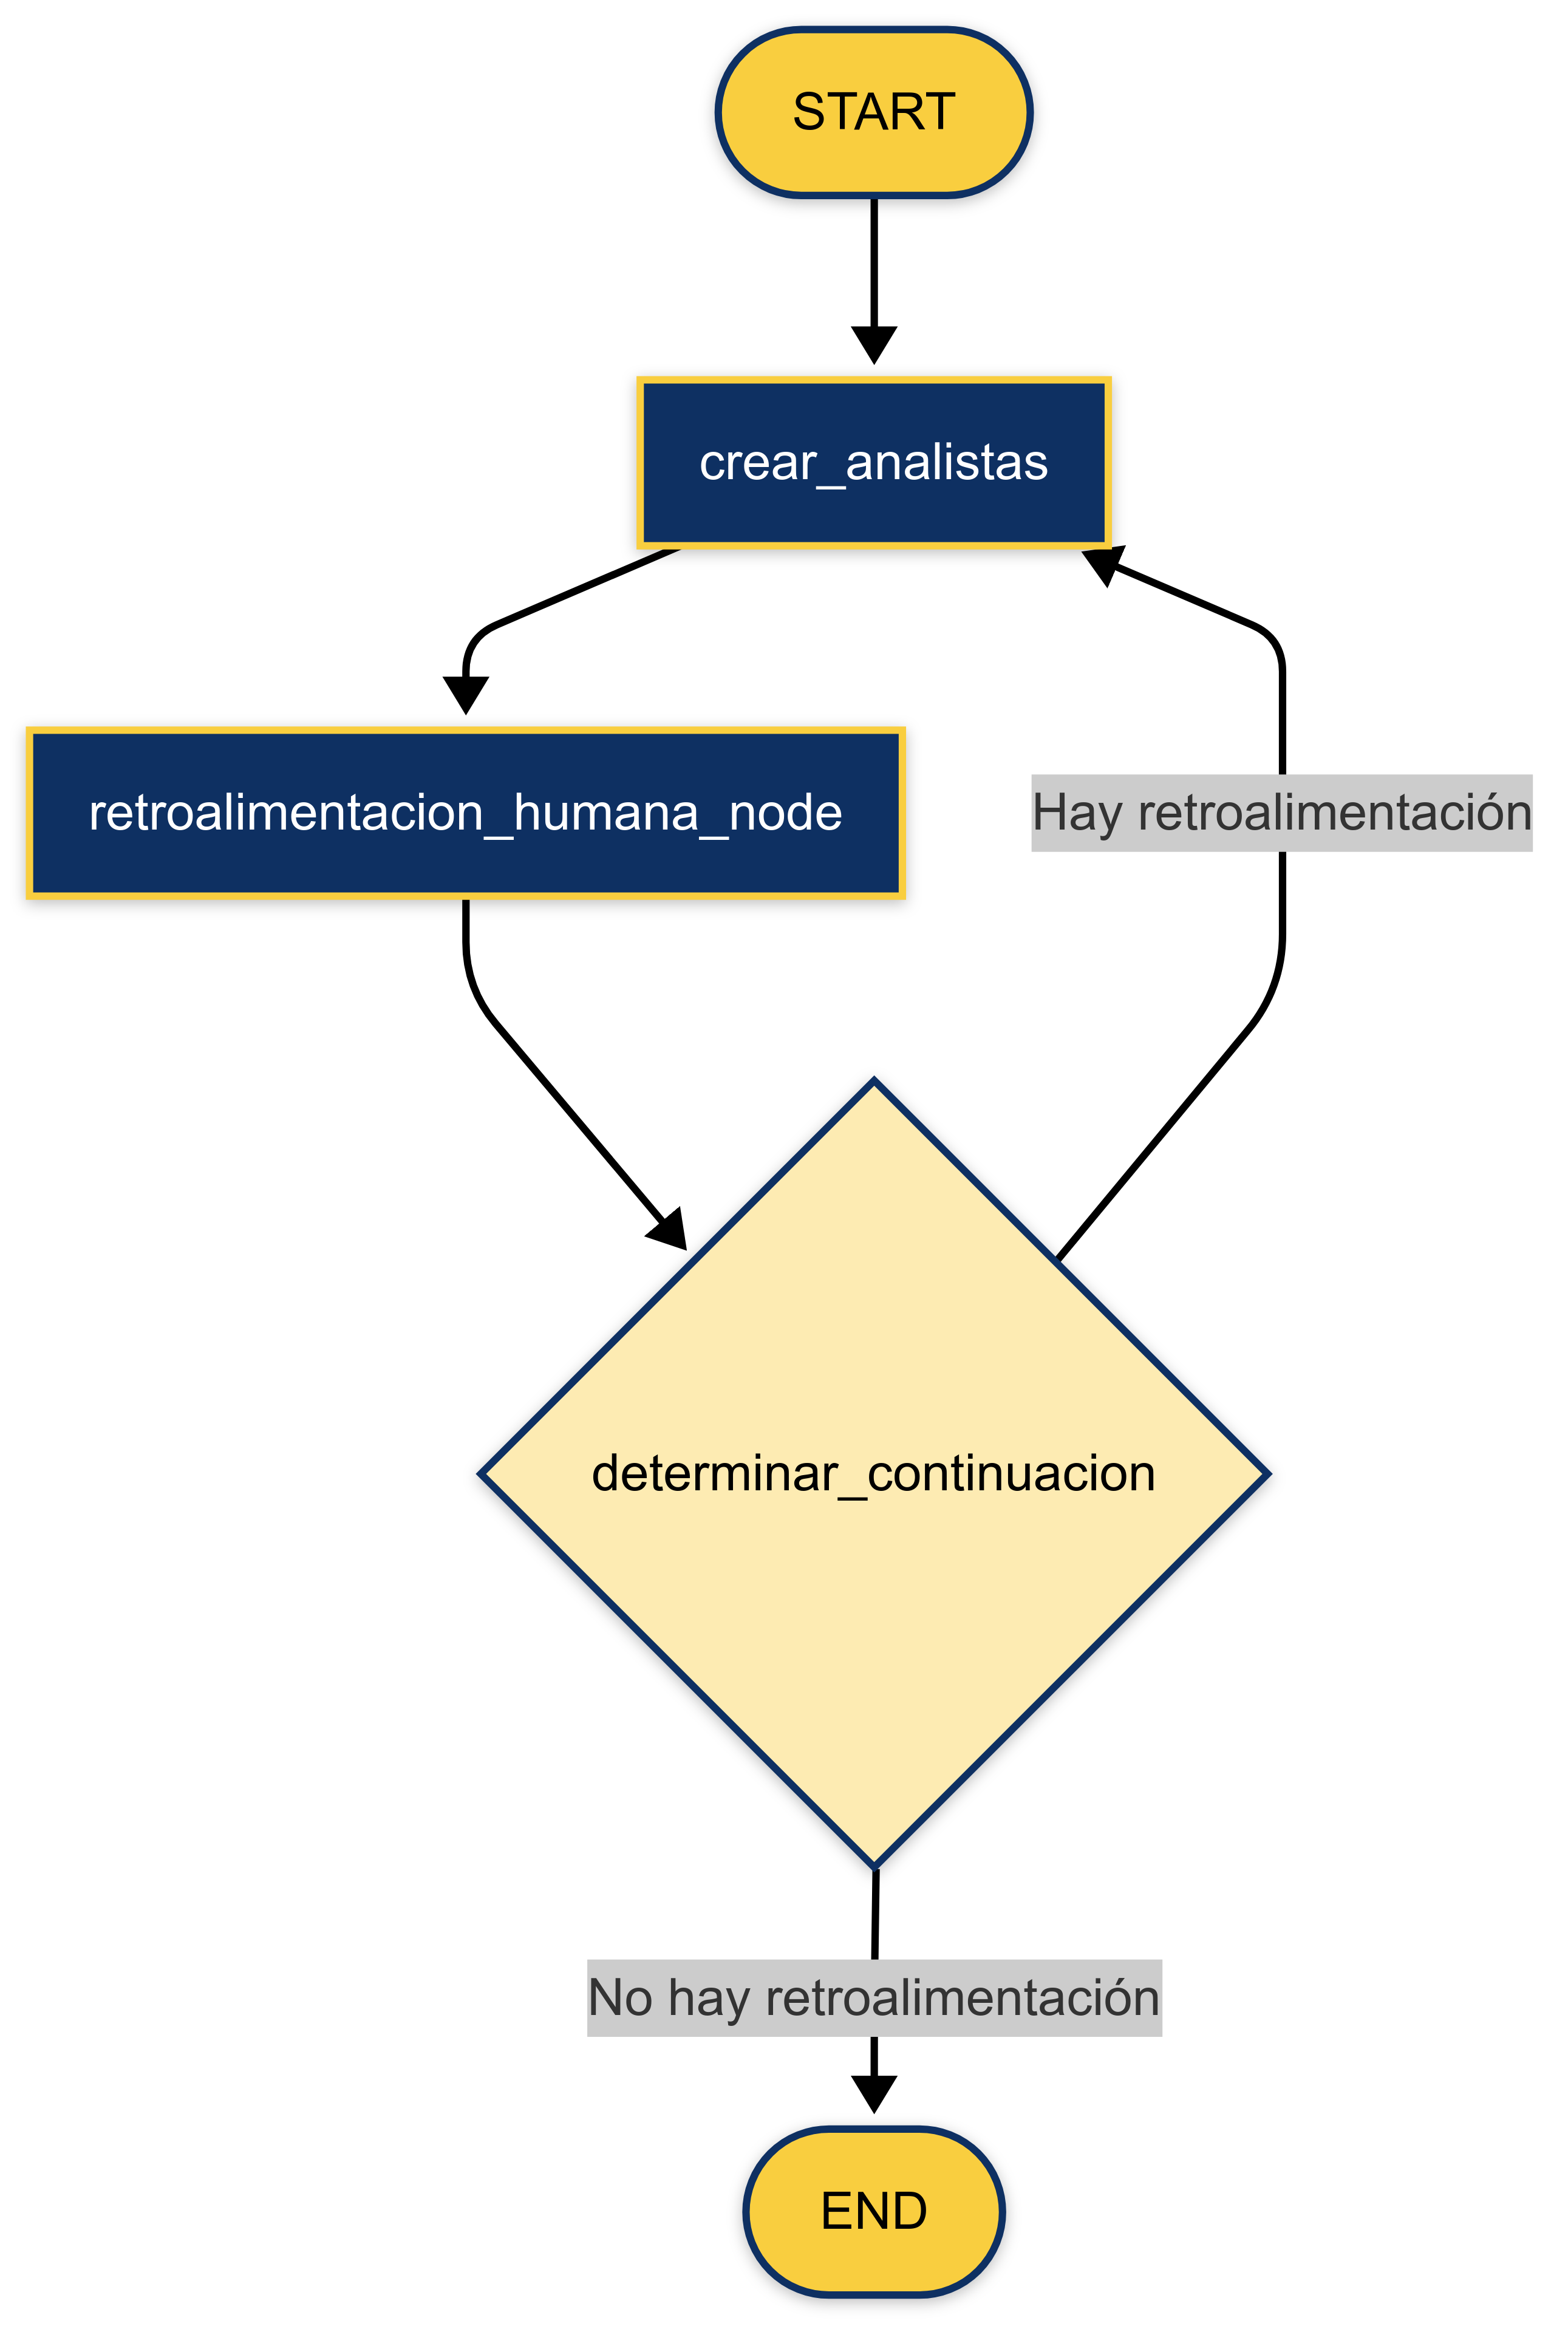

A continuación podemos ejecutar el flujo para un topic o tema dado. Con el método stream() podemos visualizar paso a paso en tiempo real el flujo de generación:

In [ ]:
# Input
max_analysts = 2
tema = "Alimentación cetogénica aplicada a diabéticos tipo 1"
thread = {"configurable": {"thread_id": "2"}}

# Run the graph until the first interruption
for event in grafo_analistas.stream({"tema":tema,"max_analistas":max_analysts,}, thread, stream_mode="values"):
    # Review
    analysts = event.get('analistas', '')
    if analysts:
        for analyst in analysts:
            print(f"Nombre: {analyst.nombre}")
            print(f"Afiliación: {analyst.afiliacion}")
            print(f"Rol: {analyst.rol}")
            print(f"Descripción: {analyst.descripcion}")
            print("-" * 50)

Nombre: Homer Simpson
Afiliación: Centro de Investigación en Nutrición y Diabetes, Universidad de Springfield
Rol: Especialista en metabolismo y fisiología en pacientes diabéticos tipo 1
Descripción: Homer es un analista apasionado por entender cómo las dietas específicas afectan el metabolismo en personas con diabetes tipo 1. Con un interés profundo en la nutrición y la fisiología, busca optimizar las estrategias dietéticas para mejorar la calidad de vida de los pacientes.
--------------------------------------------------
Nombre: Jay Pritchett
Afiliación: Instituto de Estudios sobre Dietas Alternativas, Universidad de Moisty Rock
Rol: Expert en manejo dietético y adhesión a regímenes en diabéticos tipo 1
Descripción: Jay se especializa en estudiar cómo los cambios en la alimentación, como la dieta cetogénica, pueden ser implementados sostenidamente por pacientes con diabetes tipo 1. Interesado en la psicología del comportamiento alimentario, trabaja en adaptar recomendaciones práctic


### *2.2 Ejecución del proceso de entrevistas*

Primeramente, para gestionar las entrevistas y la recopilación de información, necesitamos un grafo de estados más complejo que pueda manejar conversaciones multi-turno y búsquedas de información.

El estado de entrevista captura toda la información necesaria para gestionar una conversación entre un entrevistador y un experto virtual, incluyendo el contexto relevante y la transcripción de la conversación.

In [ ]:
import operator
from typing import Annotated
from langgraph.graph import MessagesState

class EstadoEntrevista(MessagesState):
    """
    Modelo para gestionar el estado para gestionar una entrevista con un experto virtual.
    """
    max_turnos: int # Número máximo de turnos de conversación
    contexto: Annotated[list, operator.add] # Documentos fuente
    analista: Analista # Analista realizando la entrevista
    transcripcion: str # Transcripción de la entrevista
    secciones: list # Secciones generadas para el informe final

class ConsultaBusqueda(BaseModel):
    """
    Modelo para estructurar las consultas de búsqueda.
    """
    consulta_busqueda: str = Field(None, description="Consulta para la búsqueda de información.")

Ahora ya se puede simular entrevistas para recopilar información detallada sobre cada aspecto del tema. Esto implica:

1. Formular preguntas relevantes basadas en el perfil del analista.
2. Buscar información actualizada para responder a estas preguntas.
3. Generar respuestas informativas y coherentes.

In [ ]:
# Instrucciones para la generación de preguntas
instrucciones_preguntas = """Eres un analista encargado de entrevistar a un experto para aprender sobre un tema específico.

Tu objetivo es obtener información interesante y específica relacionada con tu tema.

1. Información interesante: Insights que las personas encontrarán sorprendentes o no obvios.

2. Específica: Información que evita generalidades e incluye ejemplos concretos del experto.

Aquí está tu tema de enfoque y conjunto de objetivos: {objetivos}

Comienza presentándote usando un nombre que encaje con tu perfil, y luego formula tu pregunta.

Continúa haciendo preguntas para profundizar y refinar tu comprensión del tema.

Cuando estés satisfecho con tu comprensión, finaliza la entrevista con: "¡Muchas gracias por tu ayuda!"

Recuerda mantener tu personaje durante toda la respuesta, reflejando el perfil y objetivos proporcionados."""

def generar_pregunta(estado: EstadoEntrevista):
    """
    Genera una pregunta basada en el perfil del analista y el contexto de la conversación.
    """
    # Obtener estado actual
    analista = estado["analista"]
    mensajes = estado["messages"]

    # Generar pregunta
    mensaje_sistema = instrucciones_preguntas.format(objetivos=analista.perfil_completo)
    pregunta = modelo_lenguaje.invoke([SystemMessage(content=mensaje_sistema)] + mensajes)

    # Actualizar mensajes en el estado
    return {"messages": [pregunta]}

Para las búsquedas de información, utilizamos servicios externos como Tavily y Wikipedia:

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults
buscador_tavily = TavilySearchResults(max_results=3)

from langchain_community.document_loaders import WikipediaLoader

# Instrucciones para la generación de consultas de búsqueda
instrucciones_busqueda = SystemMessage(content="""Analizarás una conversación entre un analista y un experto.

Tu objetivo es generar una consulta bien estructurada para buscar información relacionada con la conversación.

Primero, analiza la conversación completa.

Presta especial atención a la última pregunta formulada por el analista.

Convierte esta pregunta en una consulta de búsqueda web bien estructurada""")

def buscar_web(estado: EstadoEntrevista):
    """
    Busca información relevante en la web basada en la última pregunta.
    """
    # Generar consulta de búsqueda estructurada
    modelo_estructurado = modelo_lenguaje.with_structured_output(ConsultaBusqueda)
    consulta = modelo_estructurado.invoke([instrucciones_busqueda] + estado['messages'])

    # Realizar búsqueda
    resultados = buscador_tavily.invoke(consulta.consulta_busqueda)

    # Formatear resultados
    documentos_formateados = "\n\n---\n\n".join(
        [
            f'<Document href="{doc["url"]}"/>\n{doc["content"]}\n</Document>'
            for doc in resultados
        ]
    )

    return {"contexto": [documentos_formateados]}

def buscar_wikipedia(estado: EstadoEntrevista):
    """
    Busca información relevante en Wikipedia basada en la última pregunta.
    """
    # Generar consulta de búsqueda estructurada
    modelo_estructurado = modelo_lenguaje.with_structured_output(ConsultaBusqueda)
    consulta = modelo_estructurado.invoke([instrucciones_busqueda] + estado['messages'])

    # Buscar en Wikipedia
    resultados = WikipediaLoader(
        query=consulta.consulta_busqueda,
        load_max_docs=2
    ).load()

    # Formatear resultados
    documentos_formateados = "\n\n---\n\n".join(
        [
            f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}"/>\n{doc.page_content}\n</Document>'
            for doc in resultados
        ]
    )

    return {"contexto": [documentos_formateados]}

Las respuestas se generan combinando la información obtenida con el perfil del experto:

In [ ]:
# Instrucciones para la generación de respuestas
instrucciones_respuesta = """Ahora estás interpretando el papel de {nombre_analista}, un experto siendo entrevistado.

El mensaje anterior fue una pregunta que TE HICIERON a ti como experto.

Tu tarea es RESPONDER a esta pregunta directamente, proporcionando información desde tu experiencia.

NO HAGAS NUEVAS PREGUNTAS. Eres el experto siendo entrevistado, no el entrevistador.

Usa este contexto para informar tu respuesta:
{contexto}

Al responder:
1. Usa únicamente información del contexto
2. Cita tus fuentes [1], [2], etc.
3. Proporciona una respuesta directa a la pregunta formulada
4. NO hagas preguntas de seguimiento - esa es tarea del entrevistador

Recuerda: Eres {nombre_analista} de {afiliacion}, no el entrevistador. Recuerda que una de tus fuentes de información siempre debe ser datos.gob
"""

def generar_respuesta(estado: EstadoEntrevista):
    """
    Genera una respuesta basada en la información recopilada y el perfil del experto.
    """
    # Obtener componentes del estado
    analista = estado["analista"]
    mensajes = estado["messages"]
    contexto = estado["contexto"]

    # Generar respuesta
    mensaje_sistema = instrucciones_respuesta.format(
        objetivos=analista.perfil_completo,
        contexto=contexto,
        nombre_analista=analista.nombre,
        afiliacion=analista.afiliacion
    )
    respuesta = modelo_lenguaje.invoke([SystemMessage(content=mensaje_sistema)] + mensajes)

    # Identificar respuesta como del experto
    respuesta.name = "experto"

    # Actualizar estado
    return {"messages": [respuesta]}

El flujo de la entrevista se gestiona mediante un sistema de enrutamiento que decide cuándo finalizar la conversación:

In [ ]:
def enrutar_mensajes(estado: EstadoEntrevista, nombre: str = "experto"):
    """
    Decide si continuar la entrevista o finalizarla basándose en el número
    de respuestas y la presencia de la frase de finalización.
    """
    # Obtener mensajes y máximo de turnos
    mensajes = estado["messages"]
    max_turnos = estado.get('max_turnos', 2)

    # Contar respuestas del experto
    num_respuestas = len(
        [m for m in mensajes if isinstance(m, AIMessage) and m.name == nombre]
    )

    # Finalizar si se ha alcanzado el máximo de turnos
    if num_respuestas >= max_turnos:
        return 'guardar_entrevista'

    # Verificar si la última pregunta incluye la frase de finalización
    ultima_pregunta = mensajes[-2]
    if "Muchas gracias por tu ayuda" in ultima_pregunta.content:
        return 'guardar_entrevista'

    return "generar_pregunta"

Finalmente, guardamos la transcripción de la entrevista para su posterior procesamiento:

In [ ]:
from langchain_core.messages import get_buffer_string

def guardar_entrevista(estado: EstadoEntrevista):
    """
    Guarda la transcripción completa de la entrevista.
    """
    # Convertir mensajes a texto
    mensajes = estado["messages"]
    transcripcion = get_buffer_string(mensajes)

    # Guardar en el estado
    return {"transcripcion": transcripcion}

### 2.3 Generación de secciones individuales

Una vez completadas las entrevistas, el siguiente paso es procesar la información recopilada para generar secciones coherentes del informe final.

El sistema utiliza un enfoque estructurado para generar cada sección del informe:

1. Analizando los documentos fuente obtenidos durante las entrevistas.
2. Creando una estructura de sección con título, resumen y fuentes.
3. Formatando el contenido en markdown para su inclusión en el informe final.

In [ ]:
# Instrucciones para la generación de secciones del informe
instrucciones_redactor = """Eres un redactor técnico experto.

Tu tarea es crear una sección concisa y fácilmente comprensible de un informe basada en un conjunto de documentos fuente.

1. Analiza el contenido de los documentos fuente:
- El nombre de cada documento fuente está al inicio del documento, con la etiqueta <Document.

2. Crea una estructura de informe utilizando formato markdown:
- Usa ## para el título de la sección
- Usa ### para los encabezados de subsecciones

3. Escribe el informe siguiendo esta estructura:
a. Título (## encabezado)
b. Resumen (### encabezado)
c. Fuentes (### encabezado)

4. Haz que tu título sea atractivo basándote en el área de enfoque del analista:
{enfoque}

5. Para la sección de resumen:
- Establece el contexto general relacionado con el área de enfoque del analista
- Destaca lo que es novedoso, interesante o sorprendente de los hallazgos de la entrevista
- Crea una lista numerada de documentos fuente, según los vayas utilizando
- No menciones los nombres de entrevistadores ni expertos
- Limita la extensión a aproximadamente 400 palabras
- Usa fuentes numeradas en tu informe (ej., [1], [2]) basándote en la información de los documentos fuente

6. En la sección de Fuentes:
- Incluye todas las fuentes utilizadas en tu informe
- Proporciona enlaces completos a sitios web o rutas específicas de documentos
- Separa cada fuente con un salto de línea. Usa dos espacios al final de cada línea para crear un salto de línea en Markdown.
- Tendrá este formato:

### Fuentes
[1] Enlace o nombre del documento
[2] Enlace o nombre del documento

7. Asegúrate de combinar fuentes. Por ejemplo, esto es incorrecto:

[3] https://ejemplo.com/articulo
[4] https://ejemplo.com/articulo

Debería ser simplemente:

[3] https://ejemplo.com/articulo

8. Revisión final:
- Asegúrate de que el informe sigue la estructura requerida
- No incluyas preámbulo antes del título del informe
- Verifica que se han seguido todas las pautas"""

def redactar_seccion(estado: EstadoEntrevista):
    """
    Genera una sección del informe basada en la entrevista y el contexto recopilado.
    """
    # Obtener componentes relevantes del estado
    transcripcion = estado["transcripcion"]
    contexto = estado["contexto"]
    analista = estado["analista"]

    # Generar la sección usando el contexto o la transcripción
    mensaje_sistema = instrucciones_redactor.format(enfoque=analista.descripcion)
    seccion = modelo_lenguaje.invoke(
        [SystemMessage(content=mensaje_sistema)] +
        [HumanMessage(content=f"Usa esta fuente para escribir tu sección: {contexto}")]
    )

    # Actualizar estado con la sección generada
    return {"secciones": [seccion.content]}

In [ ]:
# Nodos y límites
interview_builder = StateGraph(EstadoEntrevista)
interview_builder.add_node("generar_pregunta", generar_pregunta)
interview_builder.add_node("buscar_web", buscar_web)
interview_builder.add_node("buscar_wikipedia", buscar_wikipedia)
interview_builder.add_node("generar_respuesta", generar_respuesta)
interview_builder.add_node("guardar_entrevista", guardar_entrevista)
interview_builder.add_node("redactar_seccion", redactar_seccion)

# Flujo
interview_builder.add_edge(START, "generar_pregunta")
interview_builder.add_edge("generar_pregunta", "buscar_web")
interview_builder.add_edge("generar_pregunta", "buscar_wikipedia")
interview_builder.add_edge("buscar_web", "generar_respuesta")
interview_builder.add_edge("buscar_wikipedia", "generar_respuesta")
interview_builder.add_conditional_edges("generar_respuesta", enrutar_mensajes,['guardar_entrevista','generar_pregunta'])
interview_builder.add_edge("guardar_entrevista", "redactar_seccion")
interview_builder.add_edge("redactar_seccion", END)


memory = MemorySaver()
interview_graph = interview_builder.compile(checkpointer=memory).with_config(run_name="Conduct Interviews")

# Vista
#display(Image(interview_graph.get_graph().draw_mermaid_png()))

podemos representar el flujo de entrevista del siguiente modo: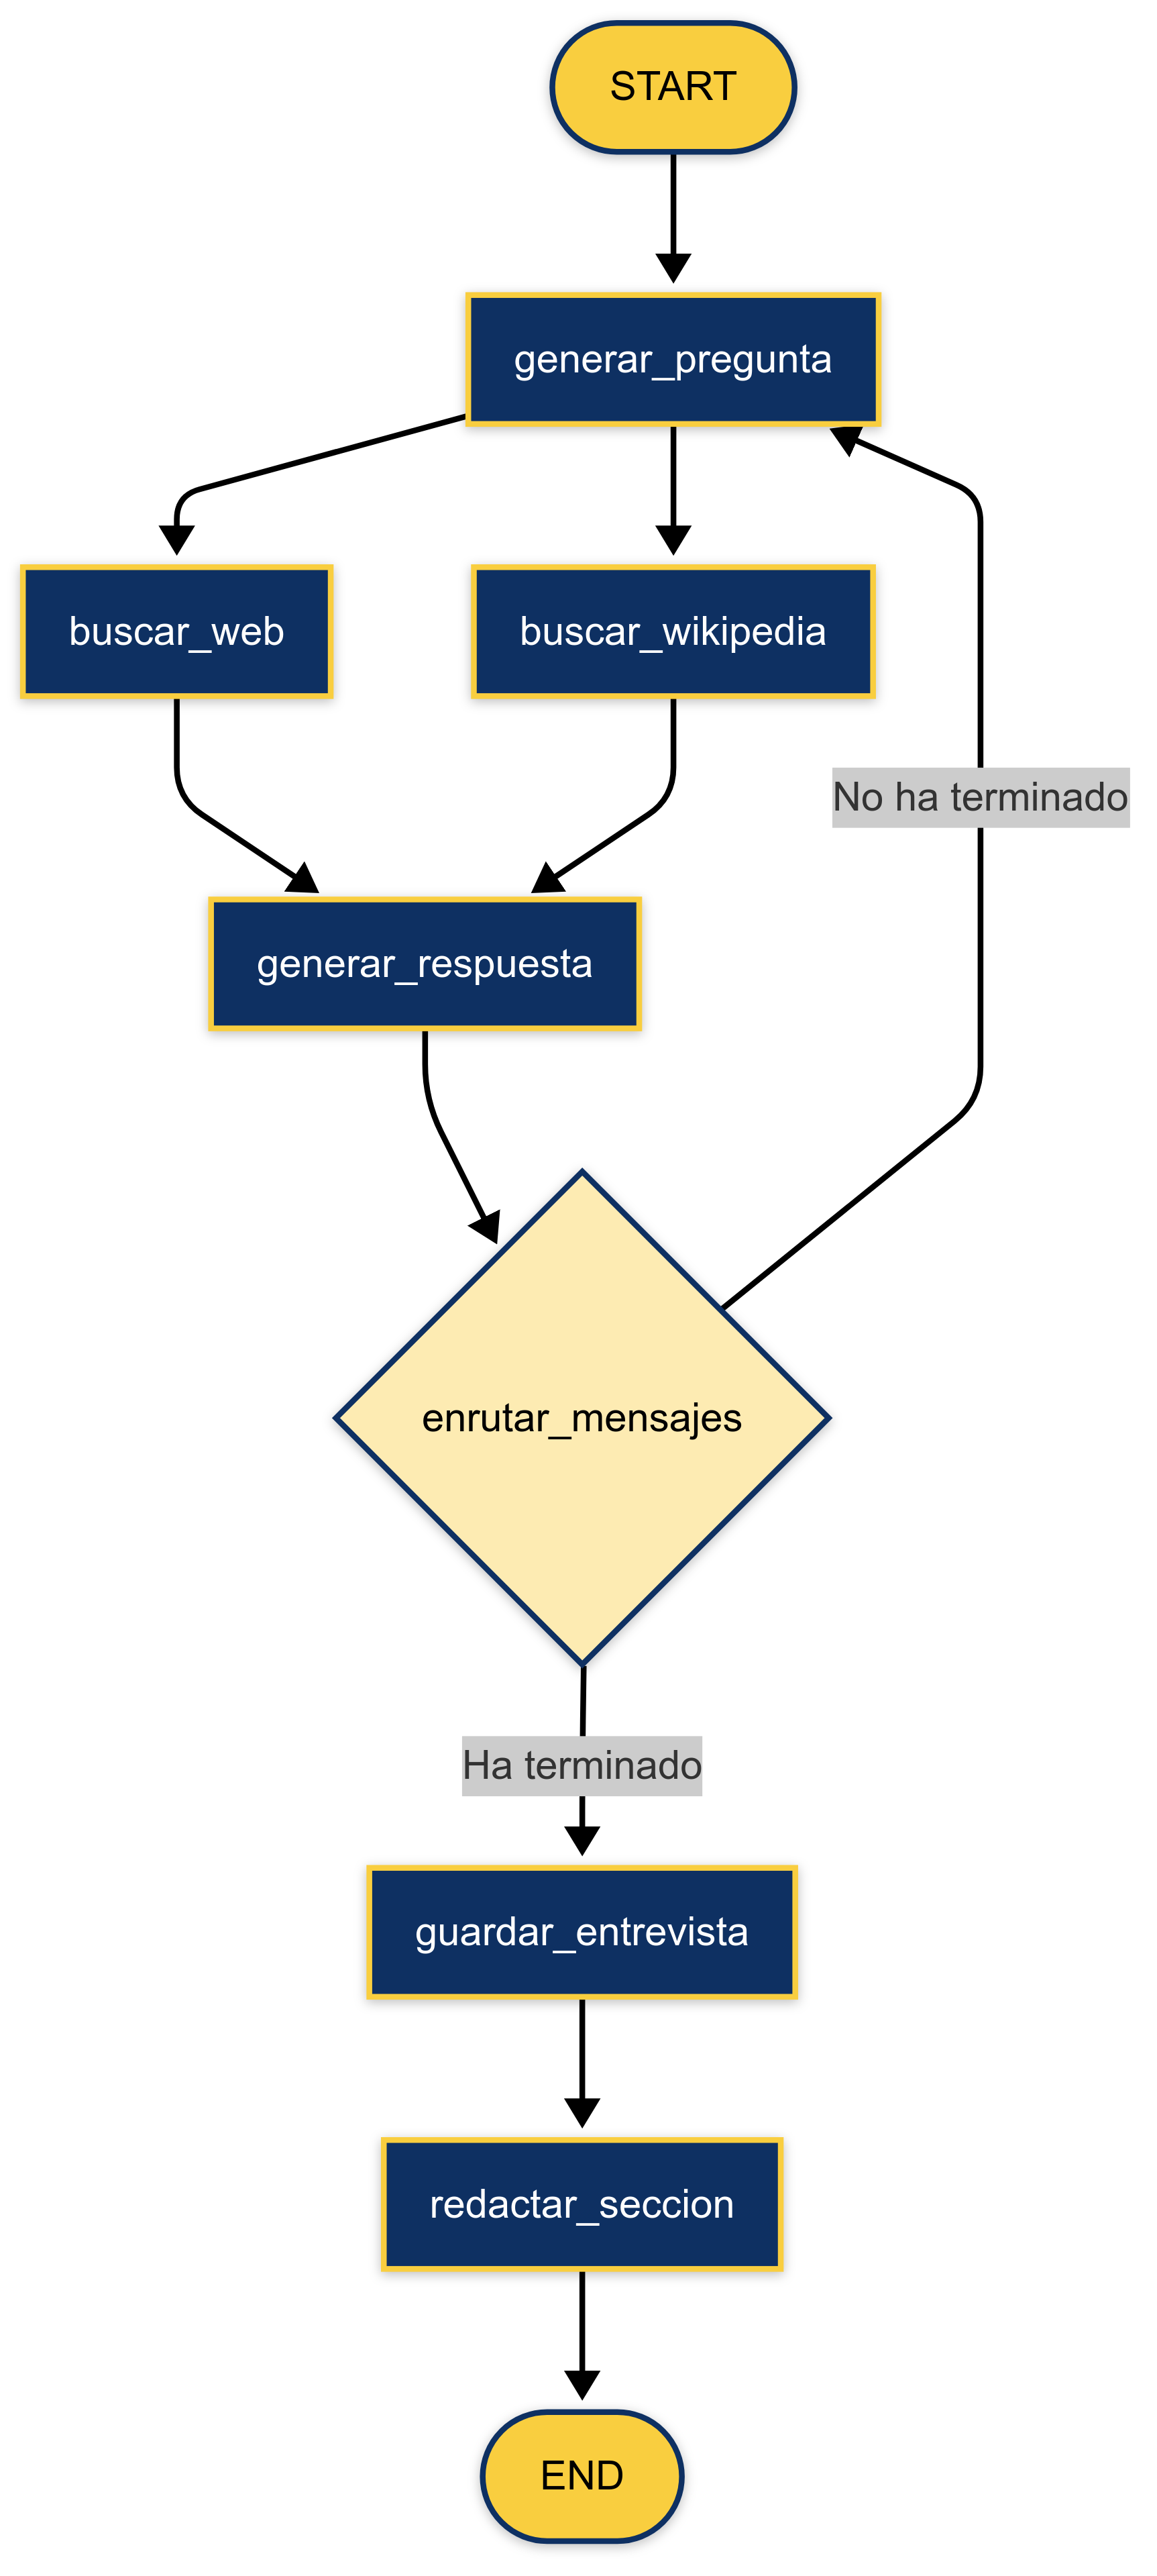

Con este flujo contaríamos con un proceso completo de entrevista y generación de informes. Sin embargo, implementaremos ahora una modificación fundamental que optimiza significativamente el rendimiento: **la paralelización de entrevistas mediante el método "Send()" de LangGraph**. Esta técnica permite ejecutar múltiples flujos de entrevista simultáneamente, reduciendo el tiempo total de procesamiento. Es importante destacar que esta implementación requiere preferiblemente una licencia de pago del modelo de lenguaje, ya que genera múltiples llamadas concurrentes que podrían exceder los límites de las versiones gratuitas.

La innovación clave radica en la **utilización del objeto Send() como mecanismo de despacho asíncrono**. Este método permite ejecutar instancias independientes del subgrafo de entrevistas para cada analista generado, mejorando drásticamente la eficiencia. En lugar de procesar cada entrevista secuencialmente, **el sistema distribuye todas las entrevistas como tareas paralelas**, recolectando posteriormente sus resultados para la fase de consolidación. Esta implementación aprovecha la capacidad de LangGraph para gestionar eficientemente flujos de trabajo complejos con múltiples ramificaciones.


## 3. Paralelización y formateo del informe

El paso final consiste en paralelizar el proceso de entrevistas y consolidar todas las secciones individuales en un informe coherente, con introducción, cuerpo y conclusión. Este proceso implica:

1. Analizar todas las secciones para identificar temas comunes.
2. Generar una introducción que presente el tema y anticipe la estructura del informe.
3. Organizar las secciones de manera lógica en el cuerpo del informe.
4. Generar una conclusión que sintetice los hallazgos principales.
5. Consolidar y organizar todas las fuentes utilizadas.

In [ ]:
from langgraph.constants import Send

class EstadoInvestigacion(TypedDict):
    tema: str  # Tema de investigación
    max_analistas: int  # Número máximo de analistas
    retroalimentacion_humana: str  # Retroalimentación del usuario
    analistas: List[Analista]  # Lista de analistas generados
    secciones: Annotated[list, operator.add]  # Clave para API Send()
    introduccion: str  # Introducción para el informe final
    contenido: str  # Contenido del informe final
    conclusion: str  # Conclusión del informe final
    informe_final: str  # Informe final completo

def iniciar_entrevistas(estado: EstadoGeneracionAnalistas):
    """
    Inicia entrevistas paralelas con todos los analistas generados.
    Este es el paso 'map' donde ejecutamos cada subgrafo de entrevista.
    """
    # Verificar si hay retroalimentación humana pendiente
    retroalimentacion_humana = estado.get('retroalimentacion_humana')
    if retroalimentacion_humana:
        return "crear_analistas"

    # Iniciar entrevistas en paralelo con cada analista
    tema = estado["tema"]
    return [Send("realizar_entrevista", { #Para cada analista, se realiza la entrevista
        "analista": analista,
        "mensajes": [HumanMessage(
            content=f"Me comentaste que estabas escribiendo un artículo sobre {tema}?"
        )]
    }) for analista in estado["analistas"]]

instrucciones_escritor_reporte = """Eres un redactor técnico creando un informe sobre este tema general:

{tema}

Tienes un equipo de analistas. Cada analista ha realizado dos tareas:

1. Han entrevistado a un experto en un subtema específico.
2. Han redactado sus hallazgos en un informe.

Tu tarea:

1. Se te proporcionará una colección de informes de tus analistas.
2. Analiza cuidadosamente los hallazgos de cada informe.
3. Consolida estos hallazgos en un resumen conciso que conecte las ideas centrales de todos los informes.
4. Resume los puntos centrales de cada informe en una única narrativa coherente.

Para dar formato a tu informe:

1. Utiliza formato markdown.
2. No incluyas preámbulos para el informe.
3. No utilices subtítulos.
4. Comienza tu informe con un único encabezado de título: ## Hallazgos
5. No menciones nombres de analistas en tu informe.
6. Conserva cualquier cita en los informes, que estarán anotadas entre corchetes, por ejemplo [1] o [2].
7. Crea una lista final y consolidada de fuentes y añádela a una sección de Fuentes con el encabezado `## Fuentes`.
8. Lista tus fuentes en orden y no las repitas.

[1] Fuente 1
[2] Fuente 2

Aquí están los informes de tus analistas para construir tu informe:

{contexto}"""

def redactar_informe(estado: EstadoInvestigacion):
    """
    Redacta el informe final consolidando todas las secciones generadas
    por los analistas.
    """
    # Obtener el conjunto completo de secciones
    secciones = estado["secciones"]
    tema = estado["tema"]

    # Concatenar todas las secciones
    secciones_formateadas = "\n\n".join([f"{seccion}" for seccion in secciones])

    # Resumir las secciones en un informe final
    mensaje_sistema = instrucciones_escritor_reporte.format(tema=tema, contexto=secciones_formateadas)
    informe = modelo_lenguaje.invoke([SystemMessage(content=mensaje_sistema)]+
                                    [HumanMessage(content=f"Escribe un informe basado en estos memorándums.")])
    return {"contenido": informe.content}

instrucciones_intro_conclusion = """Eres un redactor técnico finalizando un informe sobre {tema}

Se te proporcionarán todas las secciones del informe.

Tu trabajo es escribir una introducción o conclusión clara y convincente.

El usuario te indicará si debes escribir la introducción o la conclusión.

No incluyas preámbulos para ninguna sección.

Apunta a unas 100 palabras, anticipando claramente (para la introducción) o recapitulando (para la conclusión) todas las secciones del informe.

Utiliza formato markdown.

Para tu introducción, crea un título convincente y usa el encabezado # para el título.

Para tu introducción, utiliza ## Introducción como encabezado de sección.

Para tu conclusión, utiliza ## Conclusión como encabezado de sección.

Aquí están las secciones para reflexionar al escribir: {secciones_formateadas}"""

def redactar_introduccion(estado: EstadoInvestigacion):
    """
    Genera una introducción para el informe final que presente
    el tema y anticipe la estructura del contenido.
    """
    # Obtener el conjunto completo de secciones
    secciones = estado["secciones"]
    tema = estado["tema"]

    # Concatenar todas las secciones
    secciones_formateadas = "\n\n".join([f"{seccion}" for seccion in secciones])

    # Generar la introducción
    instrucciones = instrucciones_intro_conclusion.format(tema=tema,
                                                         secciones_formateadas=secciones_formateadas)
    intro = modelo_lenguaje.invoke([instrucciones]+
                                  [HumanMessage(content=f"Escribe la introducción del informe")])
    return {"introduccion": intro.content}

def redactar_conclusion(estado: EstadoInvestigacion):
    """
    Genera una conclusión para el informe final que sintetice
    los hallazgos principales y cierre el documento.
    """
    # Obtener el conjunto completo de secciones
    secciones = estado["secciones"]
    tema = estado["tema"]

    # Concatenar todas las secciones
    secciones_formateadas = "\n\n".join([f"{seccion}" for seccion in secciones])

    # Generar la conclusión
    instrucciones = instrucciones_intro_conclusion.format(tema=tema,
                                                         secciones_formateadas=secciones_formateadas)
    conclusion = modelo_lenguaje.invoke([instrucciones]+
                                       [HumanMessage(content=f"Escribe la conclusión del informe")])
    return {"conclusion": conclusion.content}

def finalizar_informe(estado: EstadoInvestigacion):
    """
    Este es el paso 'reduce' donde reunimos todas las secciones,
    las combinamos y reflexionamos sobre ellas para escribir
    la introducción y conclusión finales.
    """
    # Guardar el informe final completo
    contenido = estado["contenido"]
    if contenido.startswith("## Hallazgos"):
        contenido = contenido.strip("## Hallazgos")
    if "## Fuentes" in contenido:
        try:
            contenido, fuentes = contenido.split("\n## Fuentes\n")
        except:
            fuentes = None
    else:
        fuentes = None

    informe_final = estado["introduccion"] + "\n\n---\n\n" + contenido + "\n\n---\n\n" + estado["conclusion"]
    if fuentes is not None:
        informe_final += "\n\n## Fuentes\n" + fuentes
    return {"informe_final": informe_final}

Para completar la implementación de nuestro agente de generación de reportes, debemos integrar todos estos componentes en un grafo completo. Esto incluye:

1. Definir los estados del grafo principal.
2. Agregar todos los nodos y conexiones.
3. Implementar la lógica de enrutamiento entre los pasos.
4. Compilar el grafo y prepararlo para su ejecución.

In [ ]:
# Agregar nodos y conexiones al grafo principal
constructor_principal = StateGraph(EstadoInvestigacion)
constructor_principal.add_node("crear_analistas", crear_analistas)
constructor_principal.add_node("retroalimentacion_humana_node", retroalimentacion_humana)
constructor_principal.add_node("realizar_entrevista", interview_builder.compile())
constructor_principal.add_node("redactar_informe", redactar_informe)
constructor_principal.add_node("redactar_introduccion", redactar_introduccion)
constructor_principal.add_node("redactar_conclusion", redactar_conclusion)
constructor_principal.add_node("finalizar_informe", finalizar_informe)

# Establecer la lógica de flujo
constructor_principal.add_edge(START, "crear_analistas")
constructor_principal.add_edge("crear_analistas", "retroalimentacion_humana_node")
constructor_principal.add_conditional_edges("retroalimentacion_humana_node",
                                          iniciar_entrevistas,
                                          ["crear_analistas", "realizar_entrevista"])
constructor_principal.add_edge("realizar_entrevista", "redactar_informe")
constructor_principal.add_edge("realizar_entrevista", "redactar_introduccion")
constructor_principal.add_edge("realizar_entrevista", "redactar_conclusion")
constructor_principal.add_edge([
    "redactar_conclusion",
    "redactar_informe",
    "redactar_introduccion"
], "finalizar_informe")
constructor_principal.add_edge("finalizar_informe", END)

# Compilar el grafo
memoria = MemorySaver()
grafo_completo = constructor_principal.compile(
    interrupt_before=['retroalimentacion_humana_node'],
    checkpointer=memoria
)

## 4. Ejecución del Agente y Generación de un informe de ejemplo

Ahora que tenemos todos los componentes implementados y conectados en nuestro grafo, podemos ejecutar el agente completo para generar un informe. Para ello, seguiremos estos pasos:

1. Definir los parámetros iniciales (tema y número de analistas).
2. Ejecutar el grafo hasta el punto de retroalimentación humana.
3. Revisar los analistas generados y proporcionar retroalimentación si es necesario. En este caso le pedimos al flujo que incluya un CEO de una startup nativa de IA generativa.
4. Continuar con la ejecución completa del grafo.
5. Revisar y presentar el informe final generado.

In [ ]:
# Definir los parámetros iniciales
max_analistas = 2
tema = "datos abiertos en España"
identificador_ejecucion = {"configurable": {"thread_id": "3"}}

# Ejecutar el grafo hasta el primer punto de interrupción
for evento in grafo_completo.stream(
    {"tema": tema, "max_analistas": max_analistas},
    identificador_ejecucion,
    stream_mode="values"
):
    # Revisar los analistas generados
    analistas_generados = evento.get('analistas', '')
    if analistas_generados:
        print("=== Analistas Generados ===")
        for analista in analistas_generados:
            print(f"Nombre: {analista.nombre}")
            print(f"Afiliación: {analista.afiliacion}")
            print(f"Rol: {analista.rol}")
            print(f"Descripción: {analista.descripcion}")
            print("-" * 50)

# Proporcionar retroalimentación (opcional)
# Por ejemplo, si queremos añadir un analista con un enfoque específico
grafo_completo.update_state(
    identificador_ejecucion,
    {"retroalimentacion_humana": "Añadir un CEO de una startup nativa de IA generativa"},
    as_node="retroalimentacion_humana_node"
)

# Verificar los analistas actualizados
for evento in grafo_completo.stream(
    None,
    identificador_ejecucion,
    stream_mode="values"
):
    analistas_generados = evento.get('analistas', '')
    if analistas_generados:
        print("=== Analistas Actualizados ===")
        for analista in analistas_generados:
            print(f"Nombre: {analista.nombre}")
            print(f"Afiliación: {analista.afiliacion}")
            print(f"Rol: {analista.rol}")
            print(f"Descripción: {analista.descripcion}")
            print("-" * 50)

# Confirmar y continuar con la ejecución
grafo_completo.update_state(
    identificador_ejecucion,
    {"retroalimentacion_humana": None},
    as_node="retroalimentacion_humana_node"
)

# Monitorear la ejecución de los nodos restantes
print("=== Progreso de Ejecución ===")
for evento in grafo_completo.stream(
    None,
    identificador_ejecucion,
    stream_mode="updates"
):
    print("--Nodo--")
    nombre_nodo = next(iter(evento.keys()))
    print(nombre_nodo)

# Mostrar el informe final generado
from IPython.display import Markdown
estado_final = grafo_completo.get_state(identificador_ejecucion)
informe = estado_final.values.get('informe_final')
print("=== Informe Final Generado ===")
display(Markdown(informe))

=== Analistas Generados ===
Nombre: Homer Simpson
Afiliación: Instituto de Datos Abiertos de España
Rol: Analista de datos abiertos y políticas públicas
Descripción: Experto en análisis de datos públicos con un enfoque en mejorar la accesibilidad y transparencia en España. Su motivación es promover una cultura de apertura de datos que beneficie a toda la comunidad.
--------------------------------------------------
Nombre: Phil Dunphy
Afiliación: Universidad de Investigaciones Tecnológicas en Datos
Rol: Especialista en visualización y comunicación de datos abiertos
Descripción: Fascinado por hacer comprensibles los datos complejos a públicos diversos, busca potenciar la utilización de datos abiertos para generar impacto social y político, especialmente en el ámbito educativo y comunitario.
--------------------------------------------------
=== Analistas Actualizados ===
Nombre: Homer Simpson
Afiliación: Instituto de Datos Abiertos de España
Rol: Analista de datos abiertos y políticas p

# Panorama de Datos Abiertos y Innovación Tecnológica en España

## Introducción

Este informe analiza el estado del uso de datos abiertos en España, destacando su impacto en el sector público y social. Se examinan las potencialidades de la apertura de datos para promover la transparencia, la participación ciudadana y la toma de decisiones basada en evidencia, a través de ejemplos y casos de estudio. Además, se evalúa el crecimiento en innovación tecnológica, especialmente en inteligencia artificial, y cómo esta tendencia impulsa el desarrollo de startups, soluciones digitales y mejoras en servicios públicos. Finalmente, se identifican desafíos y oportunidades para fortalecer el uso ético y efectivo de los datos y tecnologías emergentes en el país.

---



Los memorándums analizados evidencian que en el contexto español, los datos abiertos están desempeñando un papel fundamental en diversos ámbitos, particularmente en el sector público, social y en la innovación tecnológica. Se observa que la apertura de datos, cuando se realiza en formatos accesibles, fomenta la transparencia gubernamental, la participación ciudadana y la eficacia en la ejecución de políticas sociales. Organizaciones no gubernamentales, administraciones locales y otros actores sociales utilizan estos datos para realizar análisis basados en evidencia que permitan diseñar acciones más efectivas [2]. Sin embargo, persiste un desconocimiento generalizado acerca de las mejores prácticas en el uso de datos abiertos, lo cual limita el potencial de estos recursos [1].

El impacto de los datos abiertos en el sector social y en la formulación de políticas públicas participativas ha sido destacado por diversos ejemplos, como la utilización de tecnologías innovadoras —Big Data, blockchain, aplicaciones móviles— para potenciar la eficiencia y la trazabilidad en programas sociales. Proyectos como la aplicación de Acción contra el Hambre en Líbano ejemplifican cómo la integración de datos en tiempo real y geolocalización permite prevenir la desnutrición y gestionar recursos de manera más eficaz [2]. Además, dichas iniciativas contribuyen a mejorar la medición del impacto social, fortaleciendo la relación con donantes y permitiendo evaluaciones basadas en datos sólidos.

Por otro lado, en el ámbito de la innovación tecnológica, se observa un crecimiento destacado en el ecosistema de inteligencia artificial en España, con una presencia significativa de startups que utilizan IA en distintas aplicaciones, desde análisis literarios automáticos hasta gestión de datos en proyectos portuarios y urbanos. En 2024, el número de startups relacionadas con IA asciende a 465, con empresas que han obtenido inversiones superiores a 15 millones de euros. Estos desarrollos están siendo impulsados por soluciones como Magnific AI, adquirida por Freepik, o plataformas como Salander, que facilitarán análisis en minutos y simplificación del acceso a datos complejos [1][2].

Asimismo, la integración de IA generativa con datos abiertos está ampliando las capacidades analíticas de las administraciones públicas y empresas, permitiendo la automatización de informes y la visualización de patrones que apoyan la toma de decisiones estratégicas. Herramientas como Wobby facilitan la interacción con grandes conjuntos de datos en lenguaje natural, disminuyendo barreras de acceso a la información y promoviendo su uso estratégico tanto en el sector público como en el privado [4].

Por último, el potencial de la inteligencia artificial en el empleo muestra una tendencia optimista, con más de un tercio de las empresas considerando que la IA generará más oportunidades que eliminaciones, y una creciente incorporación de estas tecnologías en las prácticas laborales diarias [3]. La tendencia en 2024 indica que España continúa consolidándose como un referente en tecnologías disruptivas y en el aprovechamiento de datos para promover un crecimiento innovador y sostenible.

En síntesis, tanto en la gestión de datos abiertos como en la innovación en inteligencia artificial, España está avanzando hacia un ecosistema más transparente, participativo y tecnológicamente avanzado, aunque aún persisten desafíos en capacitación, gobernanza y ética que requieren la atención de todos los actores involucrados.


---

## Conclusión

El avance de los datos abiertos y la inteligencia artificial en España ha demostrado ser un motor clave para la transformación social, económica y administrativa. La apertura de datos ha fortalecido la transparencia, la participación ciudadana y el impacto social, mientras que la integración de la IA ha impulsado la innovación en startups y en proyectos públicos, generando nuevas oportunidades laborales y soluciones eficientes. Sin embargo, persisten desafíos relacionados con la gobernanza, la ética y la capacidad técnica que deben ser abordados para maximizar su potencial. Fomentar la colaboración, la capacitación y la regulación adecuada será esencial para consolidar un ecosistema sostenible y de alto impacto en el futuro cercano.

## Fuentes
- https://www.esimpact.org/wp-content/uploads/2019/11/LIBRO-ESIMPACT-A4inter-20191028-vf.pdf  
- https://www.pwc.es/es/publicaciones/economia-social/assets/ong-conocimiento-pwc.pdf  
- https://idatosabiertos.org/wp-content/uploads/2021/03/IL_DOC_Modelosdeimplementacion-v41.pdf  
- https://datos.gob.es/es/noticia/el-impacto-social-de-los-datos-abiertos  
- https://elreferente.es/startups/15-startups-espanolas-de-inteligencia-artificial-a-tener-en-cuenta-durante-el-ano-2024/  
- https://emprendedores.es/casos-de-exito/startups-de-ia-innovadoras-2024/  
- https://www.unltdspain.org/blog/la-ia-un-vector-de-crecimiento-para-las-startups-espanolas  
- https://datos.gob.es/es/blog/datos-abiertos-e-ia-generativa-sinergias-y-casos-de-u

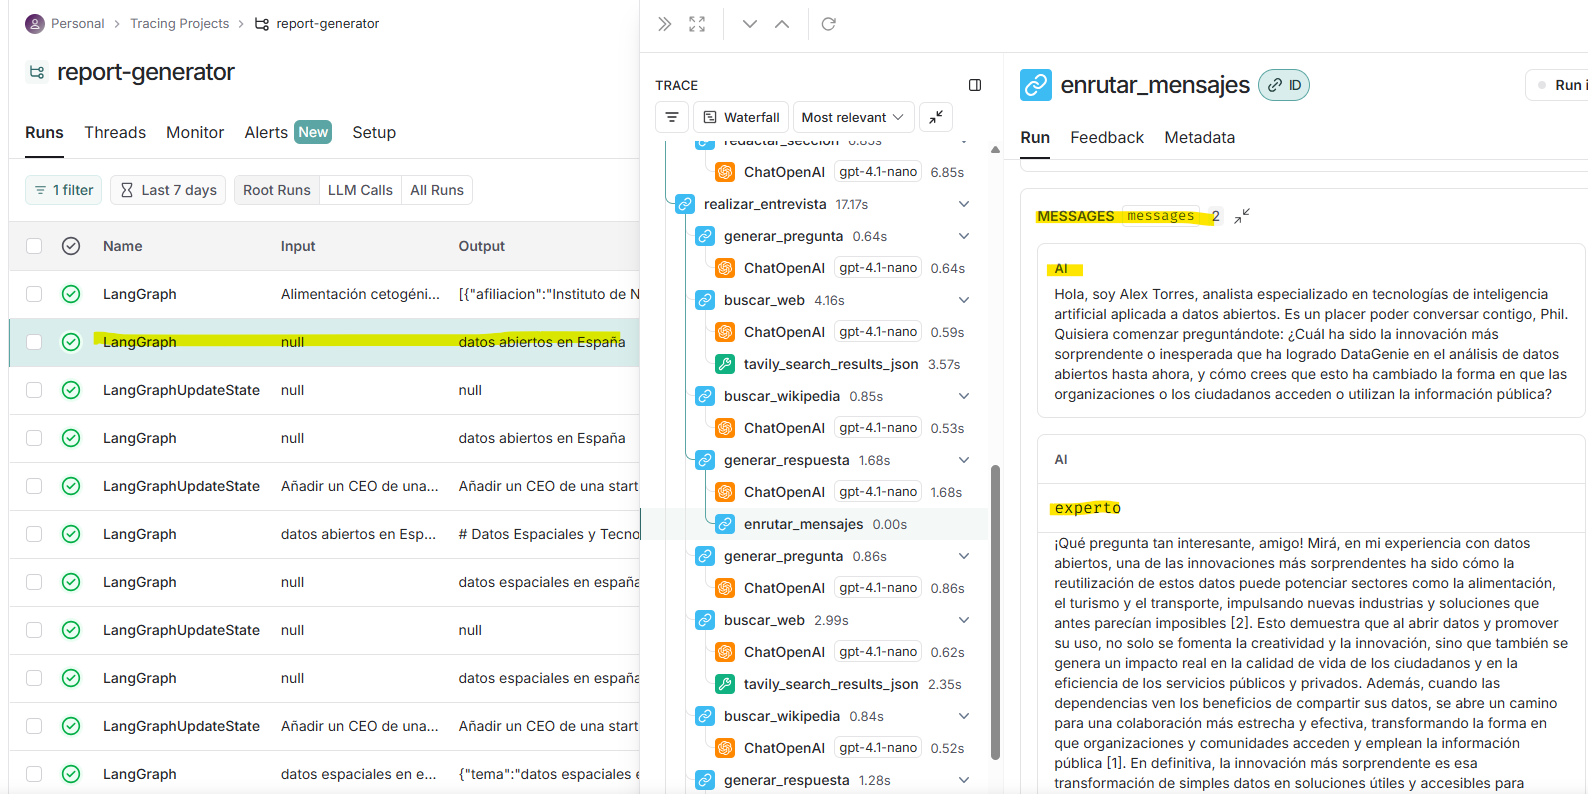

Como se puede observar en el ejemplo anterior y en la captura de Langsmith, el proceso se ejecuta de manera dinámica con varios nodos coordinados.

Langsmith es una plataforma de observabilidad desarrollada por LangChain que permite monitorizar, depurar y optimizar flujos de trabajo basados en LLMs. En nuestro proyecto, hemos configurado Langsmith mediante las variables de entorno `LANGCHAIN_API_KEY`, `LANGCHAIN_TRACING_V2` y `LANGCHAIN_PROJECT`, lo que nos permite registrar y visualizar cada ejecución del grafo.

Particularmente, la función `enrutar_mensajes` juega un papel crucial, actuando como el director de orquesta que determina si una entrevista debe continuar o finalizar. En la interfaz de Langsmith, podemos apreciar visualmente el flujo completo, desde la generación de preguntas hasta la búsqueda de información y la producción de respuestas.

Cada uno de estos pasos se registra con su tiempo de ejecución, entrada y salida, lo que facilita la identificación de cuellos de botella o problemas en el flujo. Esta visualización del proceso no solo facilita la depuración del sistema, sino que también proporciona transparencia sobre cómo se desarrolla cada conversación, permitiendo optimizar el rendimiento y la calidad de las respuestas en iteraciones futuras.

## 5. Conclusiones y Aplicaciones Prácticas

Hemos construido con éxito un agente avanzado de generación de reportes utilizando LangGraph y modelos de lenguaje. Este enfoque tiene varias ventajas sobre los métodos tradicionales:

### *5.1 Ventajas del Enfoque*

1. **Diversidad de perspectivas**: Al generar analistas virtuales con diferentes enfoques y especialidades, obtenemos un informe más rico y equilibrado que si utilizáramos un único modelo.

2. **Profundidad de información**: Las entrevistas simuladas permiten explorar aspectos específicos del tema con mayor detalle y precisión.

3. **Estructura coherente**: El proceso de consolidación garantiza que el informe final tenga una estructura lógica, con introducción, desarrollo temático y conclusión.

4. **Investigación basada en fuentes**: La capacidad de buscar información en tiempo real permite que el informe se base en datos actuales y relevantes.

5. **Interactividad**: La posibilidad de intervención humana en la selección de analistas permite adaptar el informe a necesidades específicas.

### *5.2 Aplicaciones Prácticas*

Este sistema puede aplicarse en numerosos contextos:

1. **Investigación de mercado**: Generación de informes sobre tendencias, competidores o nuevos mercados.

2. **Análisis de políticas**: Evaluación de políticas públicas desde múltiples perspectivas.

3. **Reportes sectoriales**: Informes detallados sobre sectores específicos de la economía o la industria.

4. **Síntesis de literatura científica**: Resúmenes de investigaciones en campos específicos con diferentes enfoques metodológicos.

5. **Análisis de impacto**: Evaluación del impacto potencial de nuevas tecnologías o cambios regulatorios.

### *5.3 Limitaciones y Trabajo Futuro*

A pesar de sus ventajas, nuestro sistema tiene algunas limitaciones:

1. **Dependencia de la calidad de los modelos base**: La calidad del informe final depende en gran medida de la capacidad de los modelos de lenguaje utilizados.

2. **Posibilidad de alucinaciones**: Los modelos de lenguaje pueden generar información incorrecta, lo que requiere verificación humana.

3. **Limitaciones en la búsqueda de información**: Las fuentes de información están limitadas a las APIs disponibles.

Para el trabajo futuro, sería interesante:

1. Implementar mecanismos de verificación automática de datos.
2. Añadir capacidades multimodales para incorporar imágenes y visualizaciones.
3. Mejorar los mecanismos de interacción humana para permitir ajustes más precisos.
4. Incorporar retroalimentación del usuario final para refinar los informes.

Con estas mejoras, este tipo de agentes podría revolucionar la forma en que generamos y consumimos informes en diversos campos profesionales y académicos. Si quieres replicar otros ejercicios de ciencia de datos, te animamos a visitar la sección de nuestra web.